In [0]:
import cv2
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot
import time

import numpy as np
%tensorflow_version 1.x
import tensorflow as tf

# from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.applications.vgg19 import VGG19, preprocess_input
# from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
# from keras.applications.xception import Xception, preprocess_input
# from keras.applications.densenet import DenseNet121, preprocess_input
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Flatten, Reshape, UpSampling2D, Conv2D
from keras.layers import Dense, Activation, MaxPooling2D, Dropout
from keras import backend as K

In [0]:
block_size = 121
c = 2

min_thresh = 100

(720, 1280)


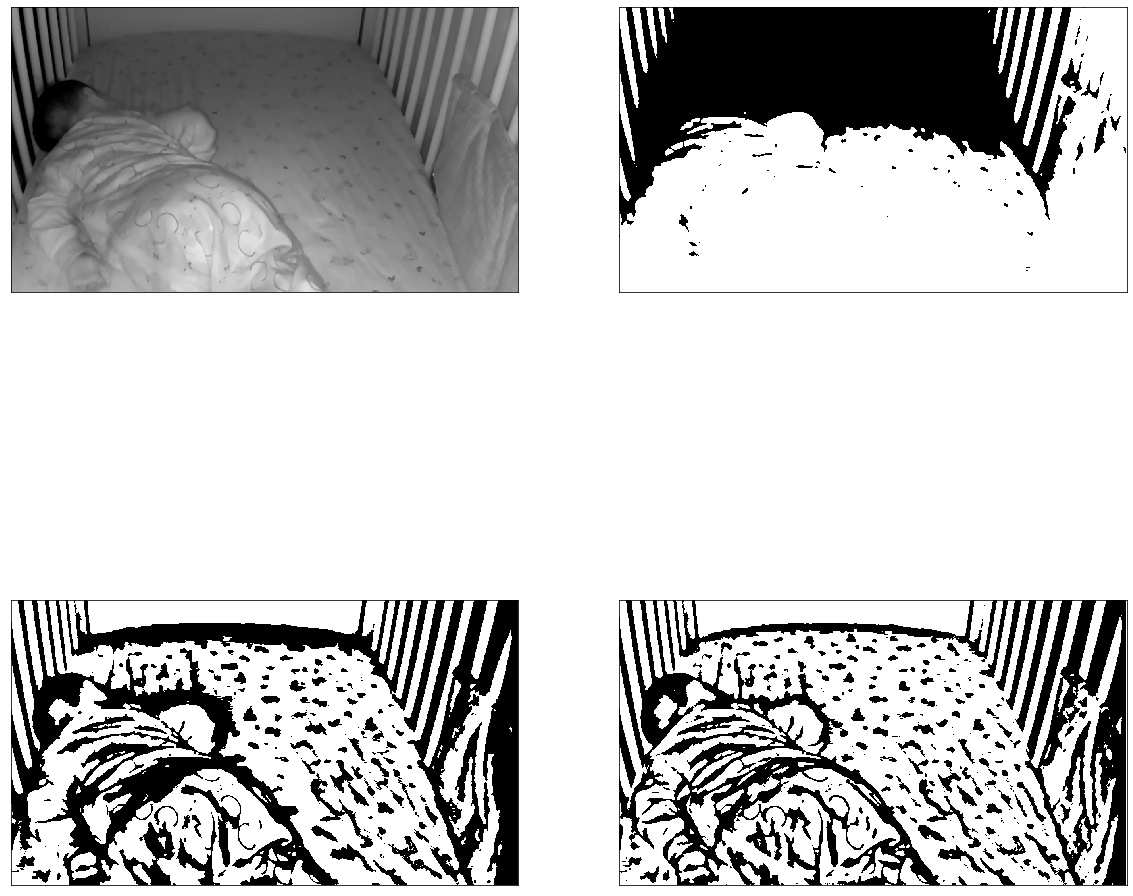

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('frame3.jpg', 0)

print(img.shape)

img = cv2.medianBlur(img, 5)

ret,th1 = cv2.threshold(img,min_thresh,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block_size,c)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c)

# titles = ['Original Image', 'Global Thresholding (v = 127)',
#             'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]


plt.figure(figsize=(20,20))

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    # plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

main_path = '/content/drive/My Drive/Masters/Colab Notebooks/Research Code/data/'
pos_thresh = 'pos_thresh/'
neg_thresh = 'neg_thresh/'

pos = 'positive-night/frames-1m/'
neg = 'negative-night/frames-1m/'
counter = 0         # counts iterations
block_size = 121
c = 2

min_thresh = 100

while counter < (60):
    img_a_path = '{0}{1}frame{2}.jpg'.format(main_path, pos, counter)

    img = cv2.imread(img_a_path, 0)
    img = cv2.medianBlur(img, 5)

    thresh = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c)

    cv2.imwrite('{0}{1}thresh{2}.jpg'.format(main_path, pos_thresh, counter), thresh)

    counter += 1

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

main_path = '/content/drive/My Drive/Masters/Colab Notebooks/Research Code/data/'
pos = 'positive-night/frames-1m/'
neg = 'negative-night/frames-1m/'
counter = 0         # counts iterations

while counter < (frames - frame_step):
    img_a_path = '{0}{1}frame{2}.jpg'.format(main_path, pos, counter)

    img = cv2.imread(img_a_path, 0)
    img = cv2.medianBlur(img, 5)

    ret,th2_1 = cv2.threshold(img,min_thresh,255,cv2.THRESH_BINARY)
    th2_2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block_size,c)
    th2_3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c)

    titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th2_1, th2_2, th2_3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

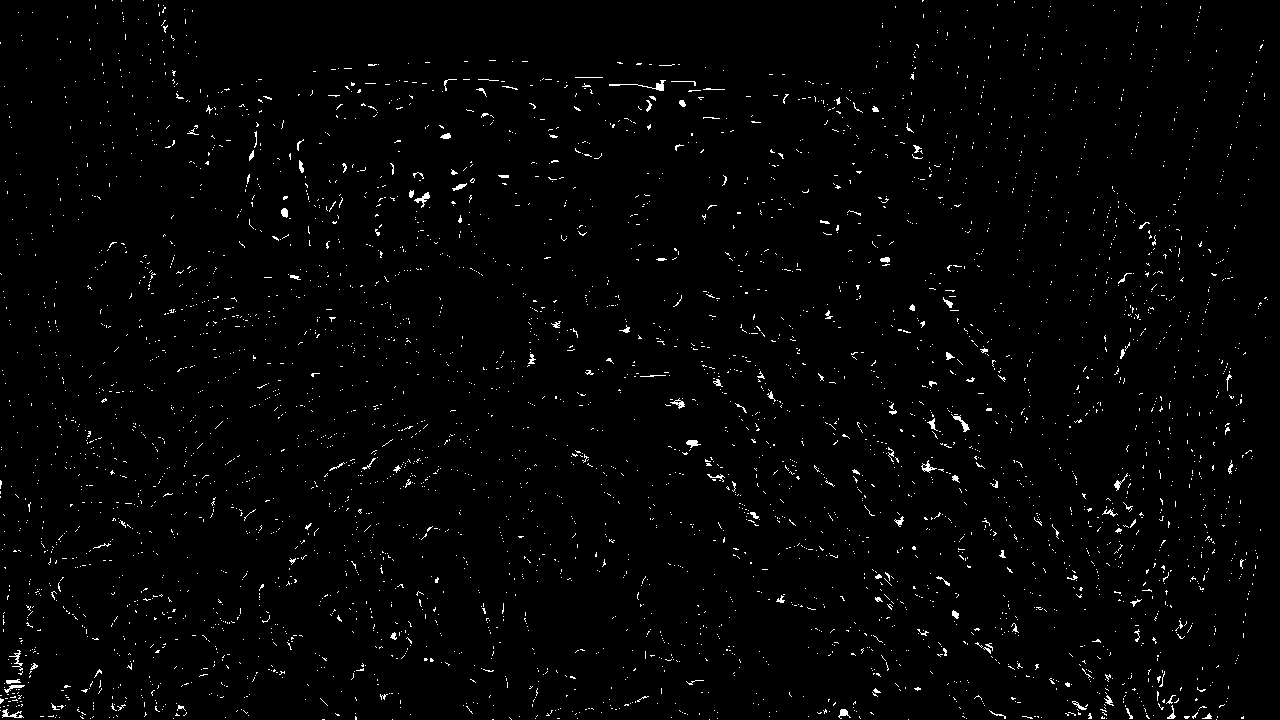

-1

In [0]:
from google.colab.patches import cv2_imshow

img_diff = cv2.subtract(th3,th2_3)

cv2_imshow(img_diff)
cv2.waitKey(0)

SSIM: 0.9842273172303337


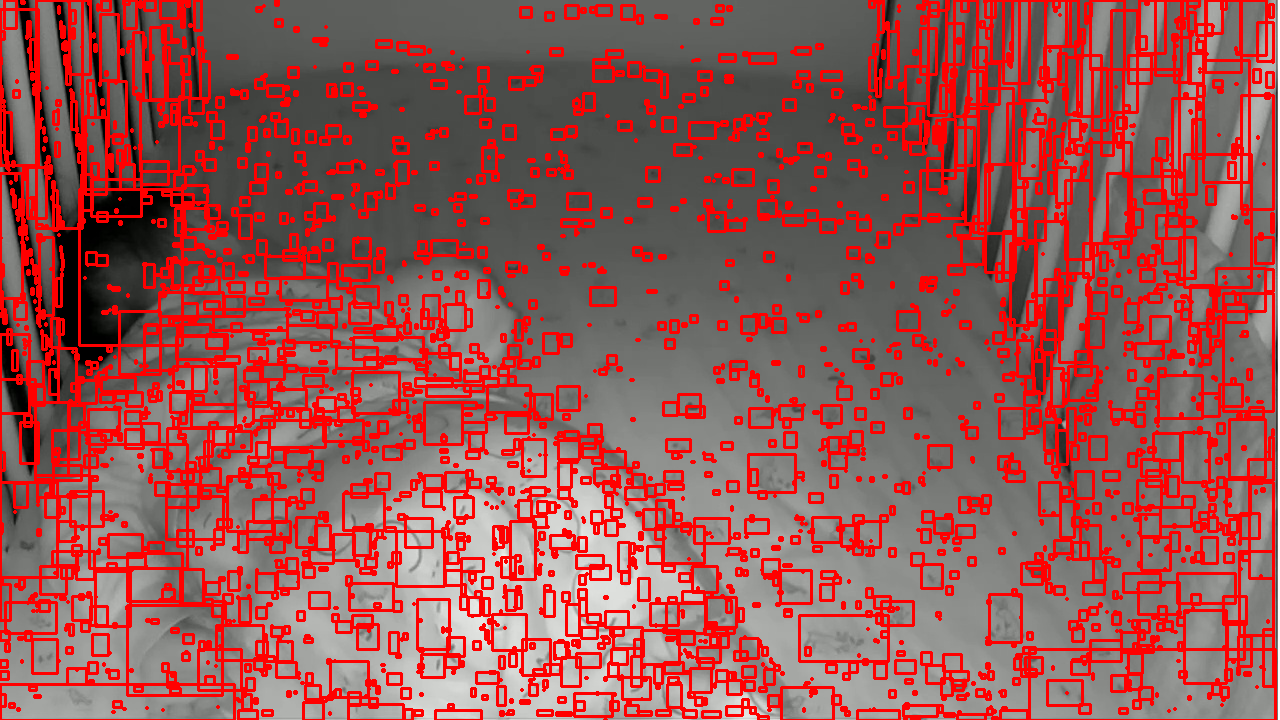

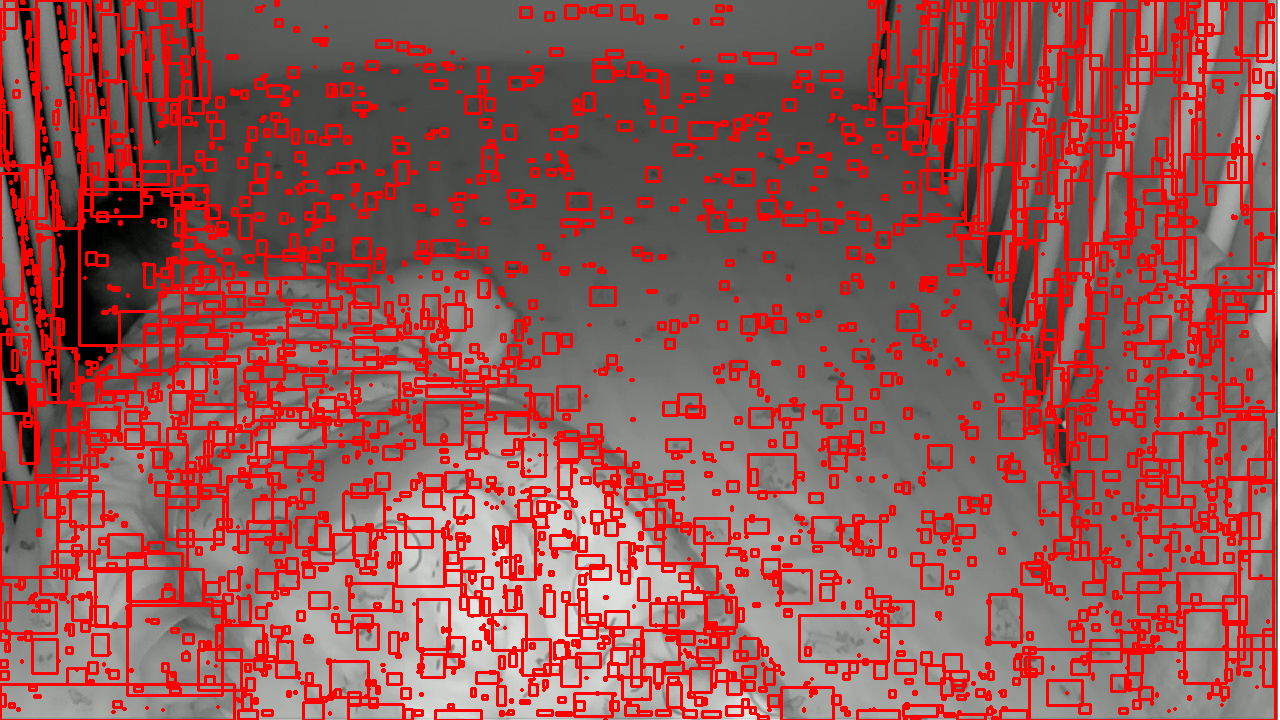

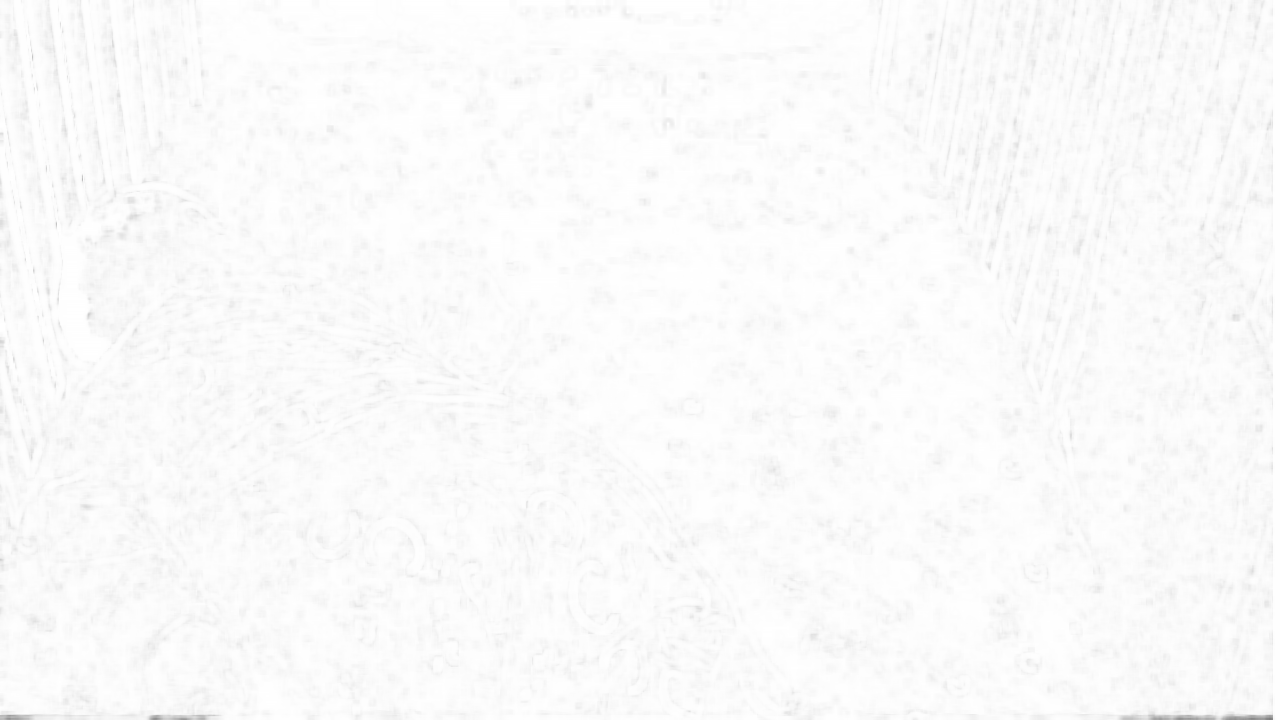

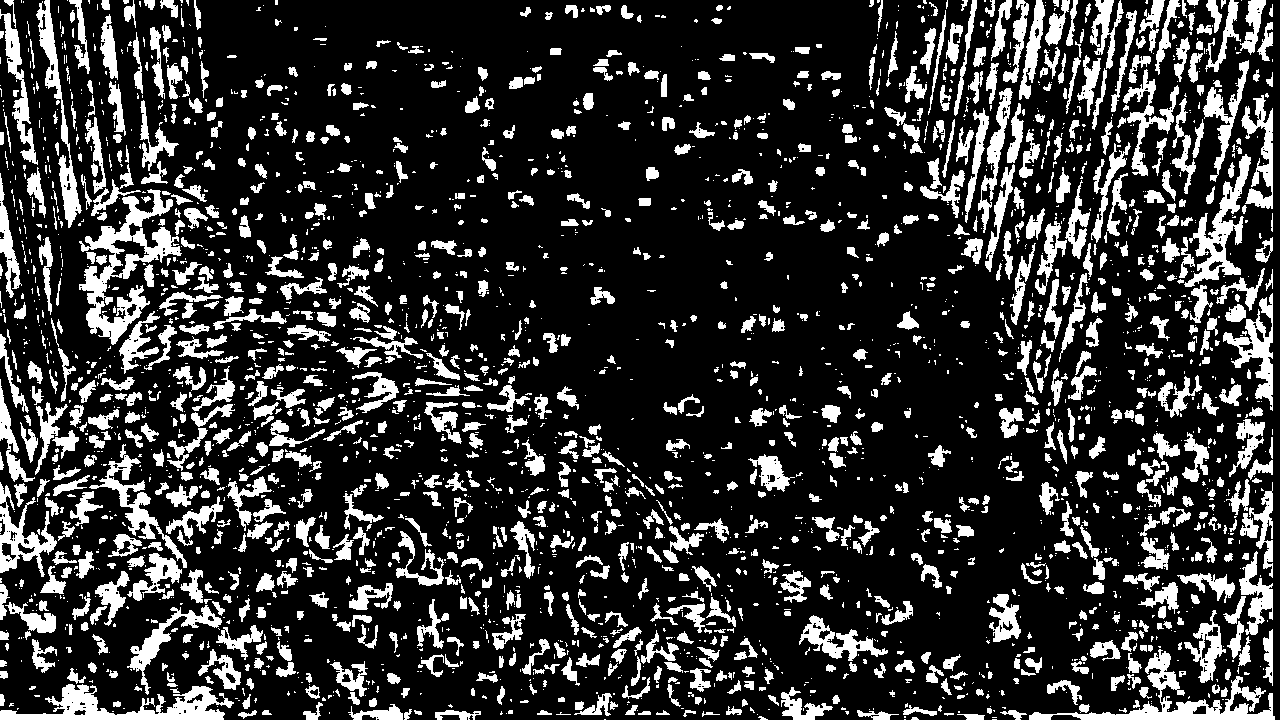

-1

In [0]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow


# load the two input images
imageA = cv2.imread('frame4.jpg')
imageB = cv2.imread('frame6.jpg')

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
cv2_imshow(imageA)
cv2_imshow(imageB)
cv2_imshow(diff)
cv2_imshow(thresh)
cv2.waitKey(0)

SSIM: 0.989569417466364


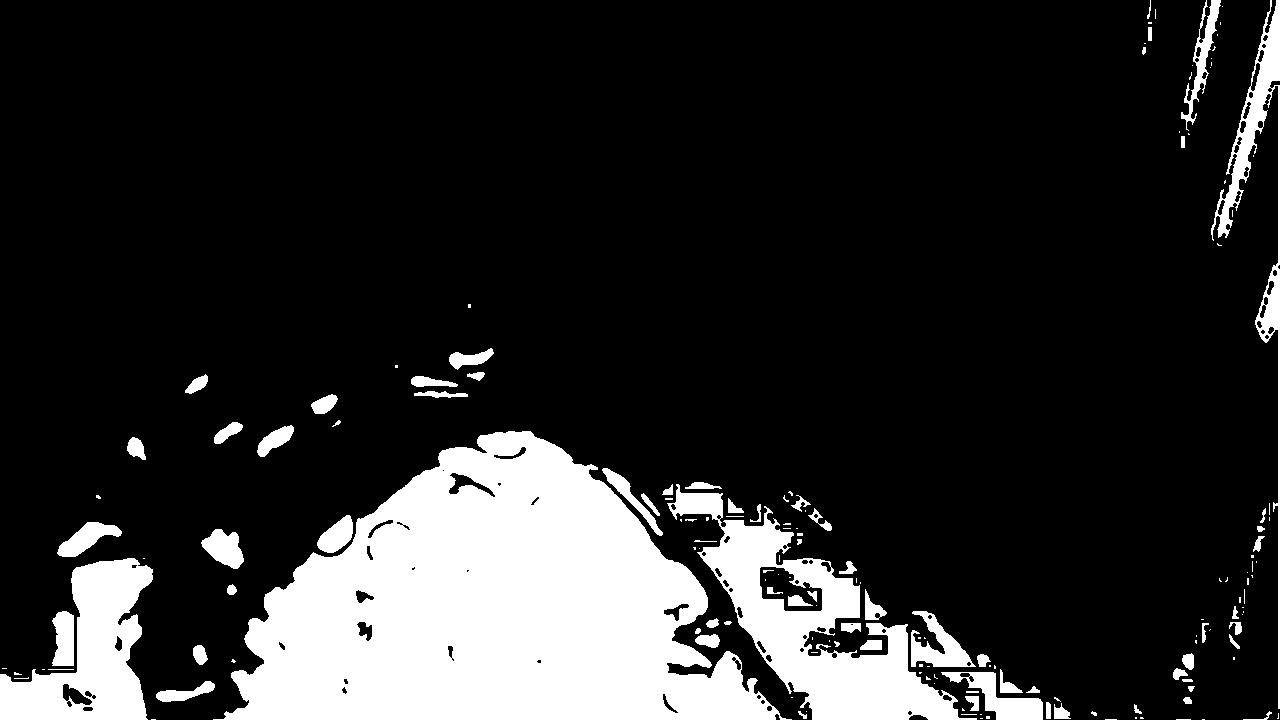

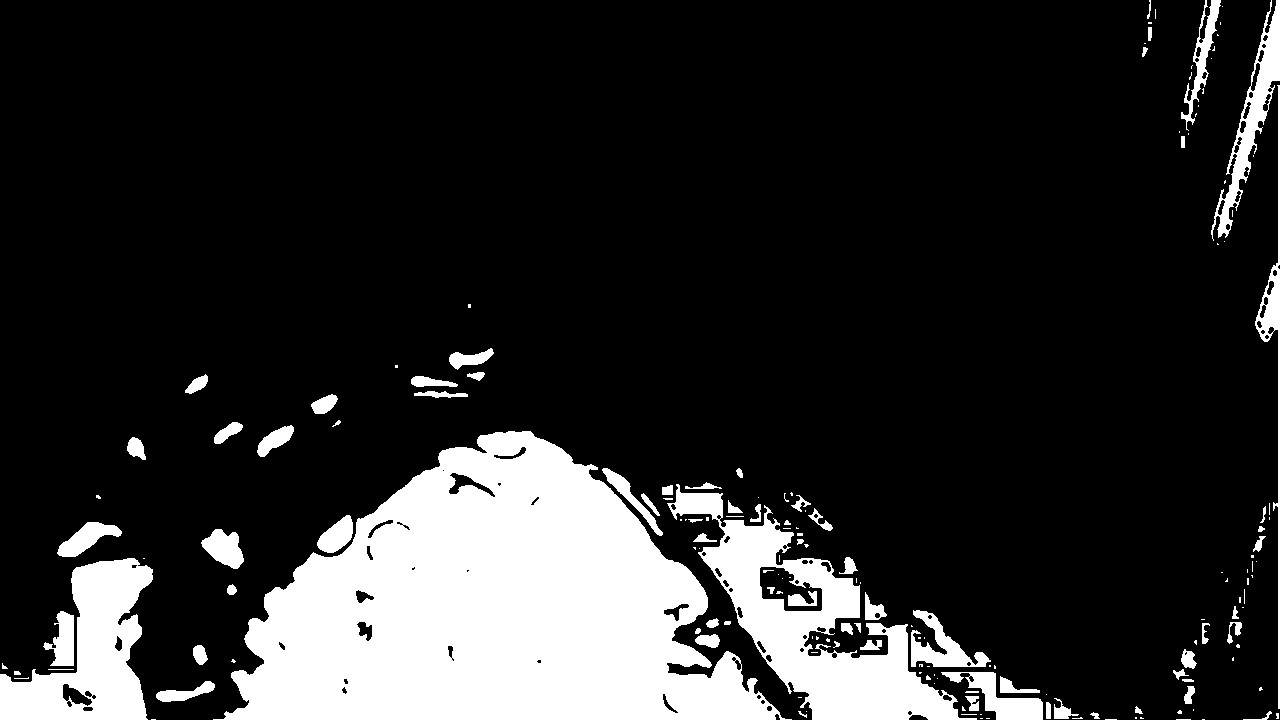

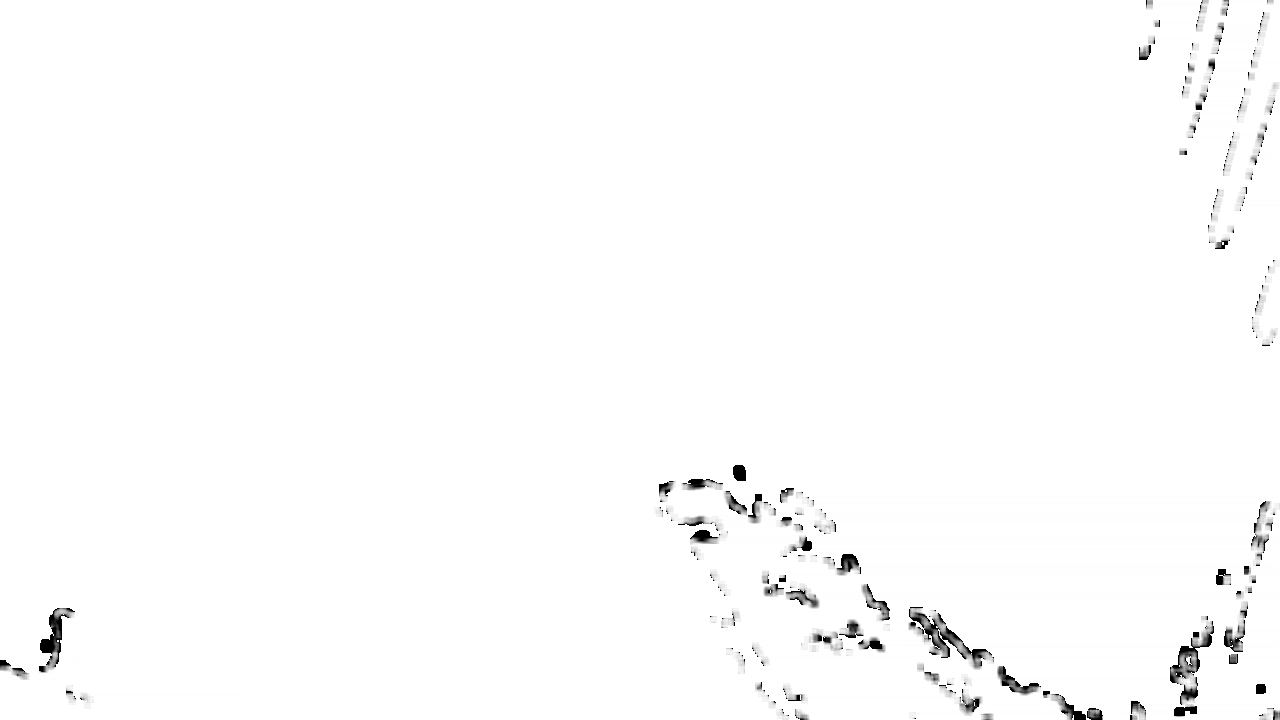

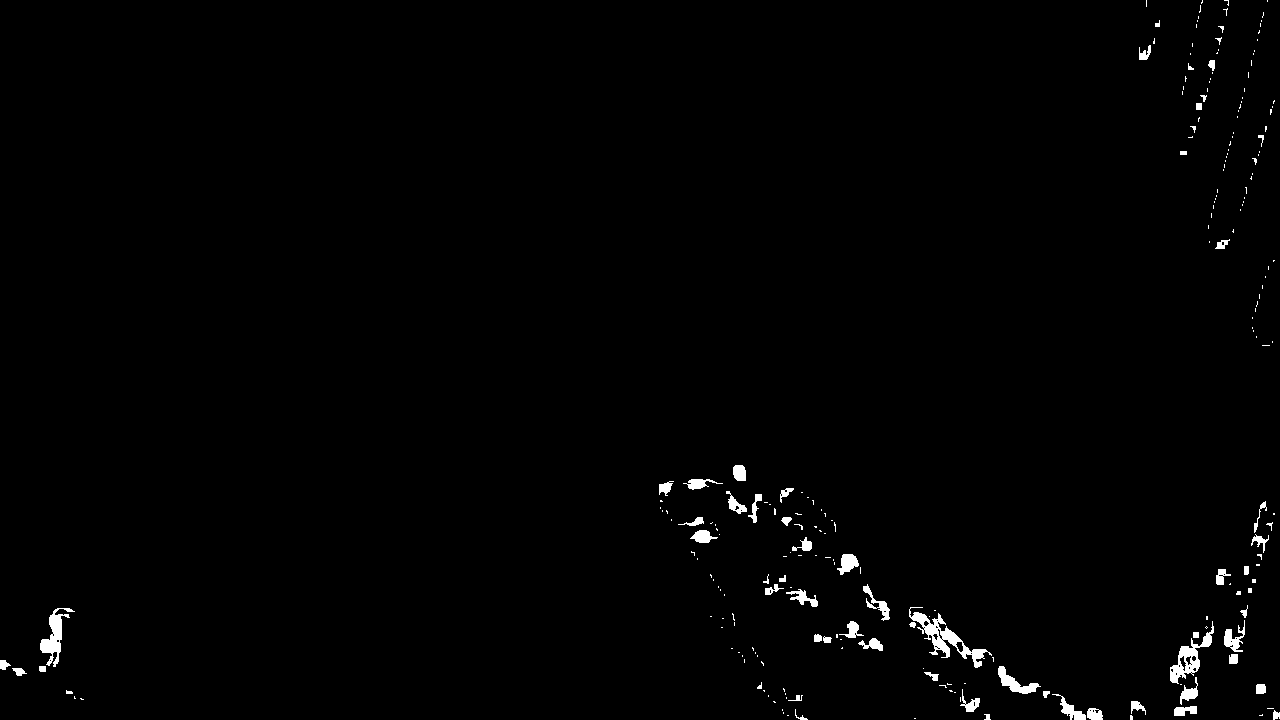

-1

In [0]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow


# load the two input images
imageA = cv2.imread('frame4.jpg')
imageB = cv2.imread('frame6.jpg')

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(th1, th2_1, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(th1, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(th2_1, (x, y), (x + w, y + h), (0, 0, 255), 2)

# show the output images
cv2_imshow(th1)
cv2_imshow(th2_1)
cv2_imshow(diff)
cv2_imshow(thresh)
cv2.waitKey(0)